In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.Load the dataset to python environment**

In [32]:
titanic_data=pd.read_csv('/content/titanic_dataset .csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
titanic_data=titanic_data.set_index('PassengerId')

In [35]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2.Preprocessing**

In [36]:
##Finding missing values
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

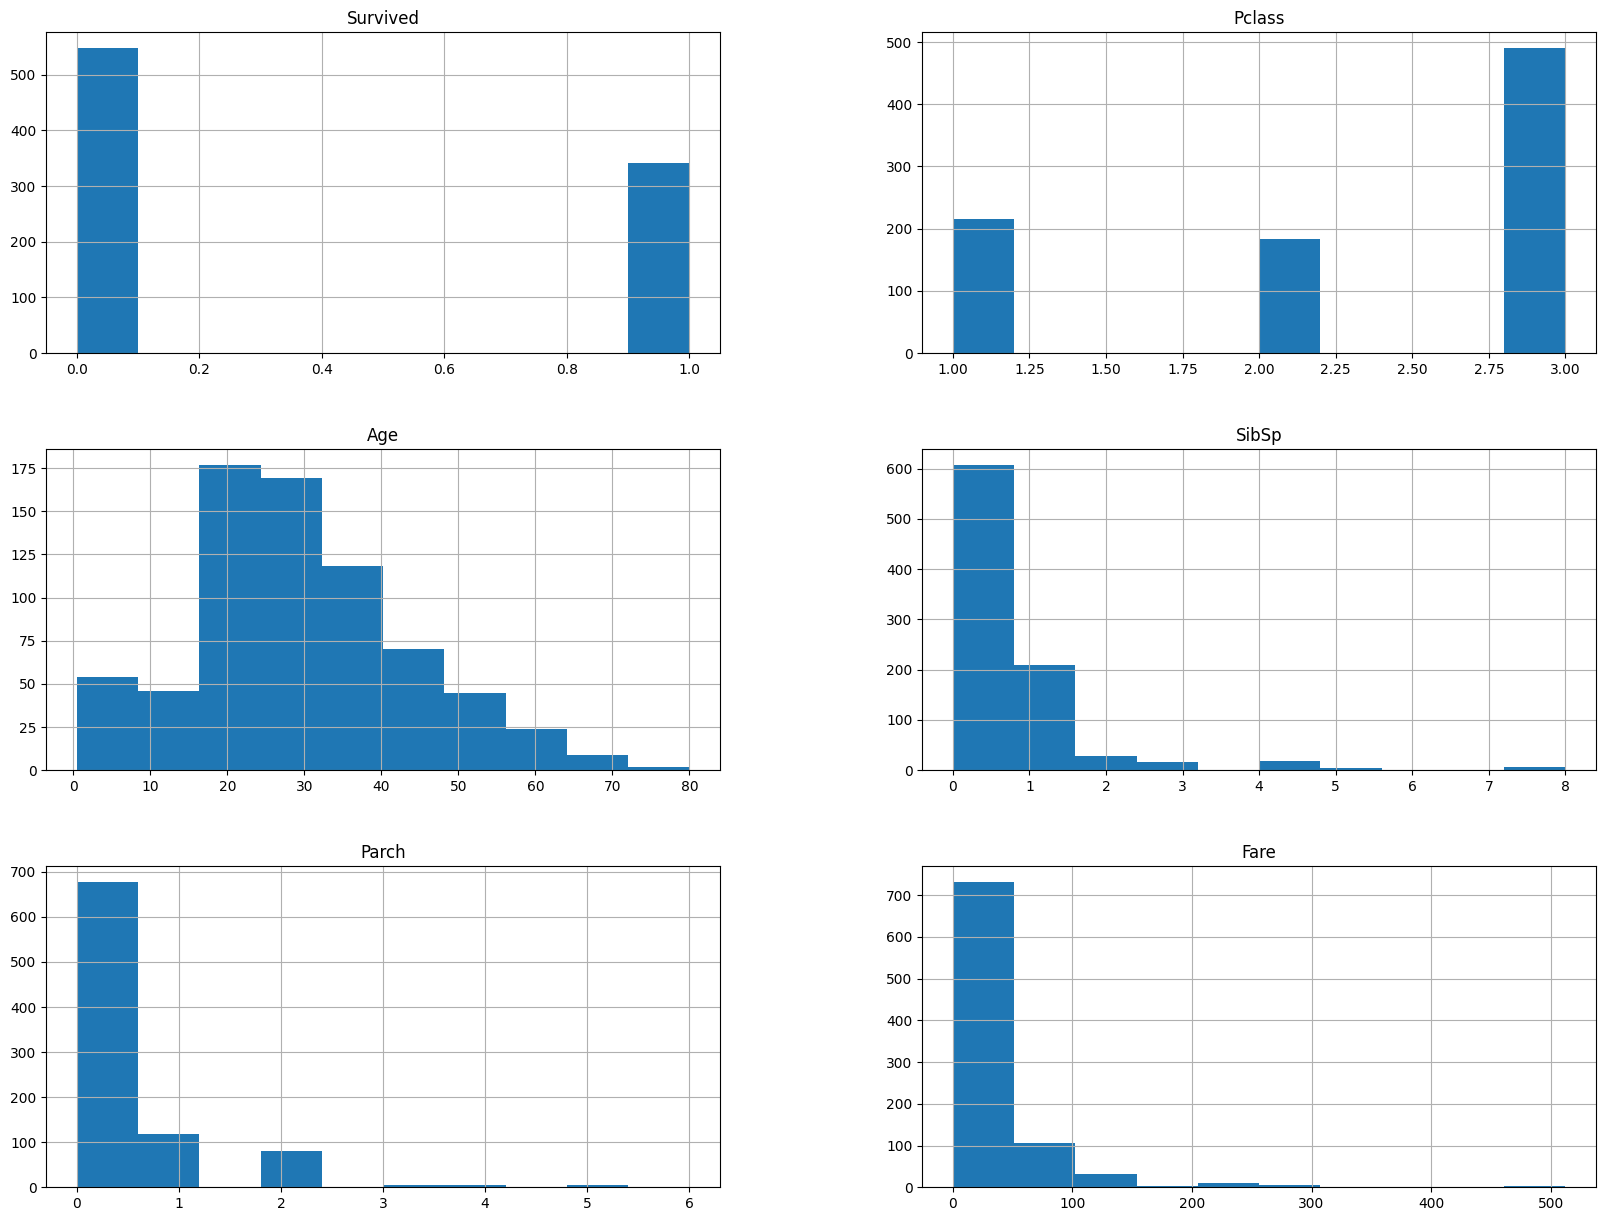

In [37]:
##Plotting histogram
freqgraph=titanic_data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [38]:
##Filling missing values

titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].median()) ##if data is skewed use median to fill NaN
titanic_data['Cabin']=titanic_data['Cabin'].fillna(titanic_data['Cabin'].mode()[0]) ##if data is object type use mode to fill NaN
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0]) ##if data is object type use mode to fill NaN
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**Handling Outliers**

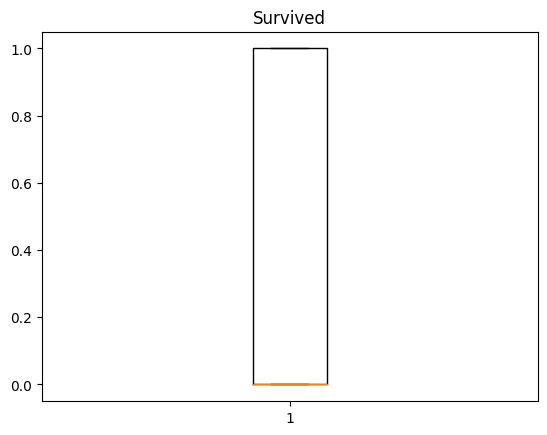

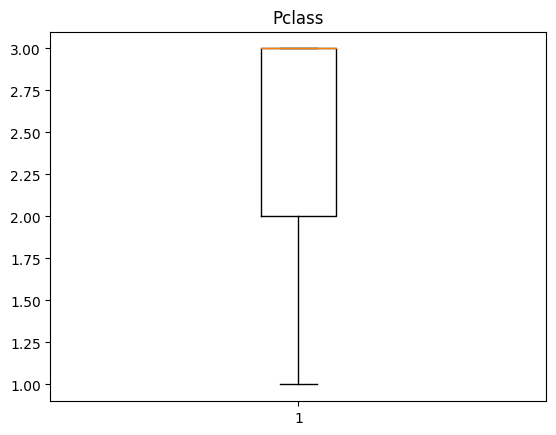

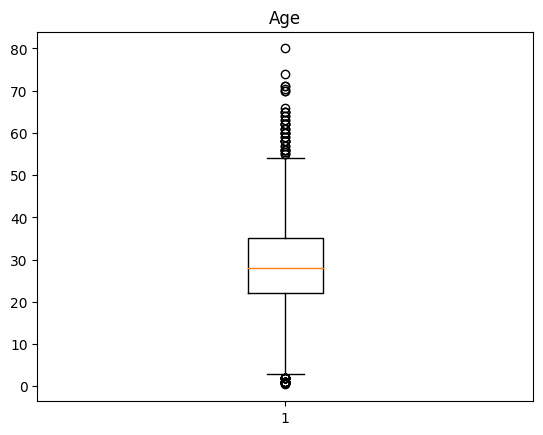

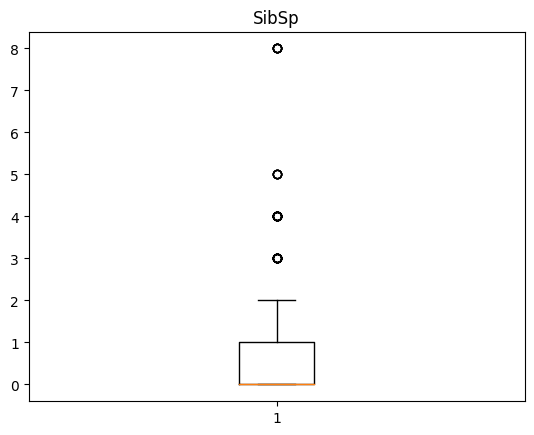

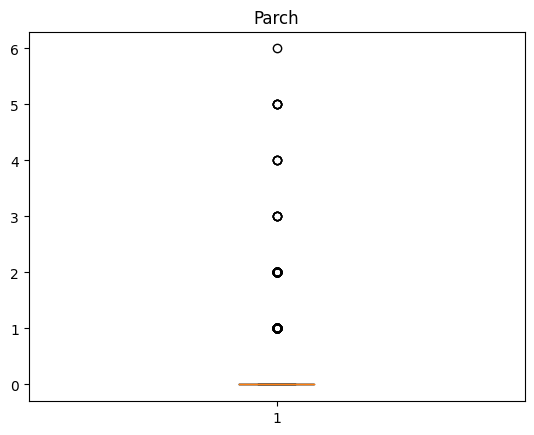

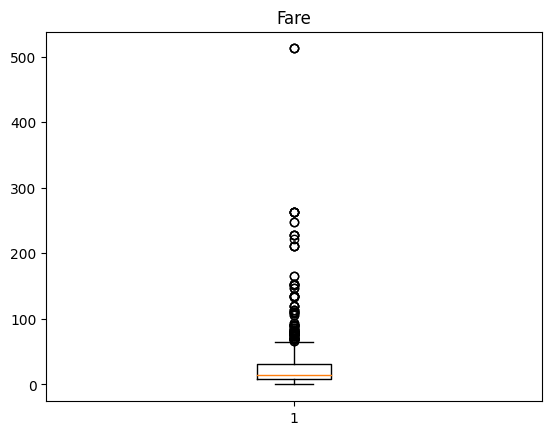

In [39]:
##Boxplot
num_columns=titanic_data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(titanic_data[i])
  plt.title(i)

In [40]:
##handling outliers
for k in ['Age','Fare','SibSp','Parch']:
   Q1=np.percentile(titanic_data[k],25,method='midpoint')
   Q1=np.percentile(titanic_data[k],50,method='midpoint')
   Q3=np.percentile(titanic_data[k],75,method='midpoint')
   IQR=Q3-Q1                      ##Inter quuaurtile range
   low_lim=Q1-1.5*IQR             ##Lower limit
   up_lim=Q3+1.5*IQR              ##Upper limit
   outliers=[]
   for x in titanic_data[k]:
    if((x < low_lim)or(x >up_lim)):
      outliers.append(x)
      titanic_data[k]=titanic_data[k].clip(lower=low_lim,upper=up_lim)##clipping

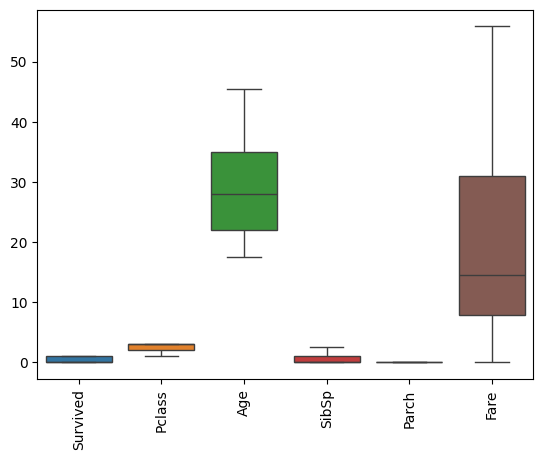

In [41]:
##boxplot
sns.boxplot(titanic_data)
plt.xticks(rotation=90)
plt.show()

In [42]:
##Dropping the Name column from the data set
titanic_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1.0,0,7.2500,S
2,1,1,female,38.0,1.0,0,55.8187,C
3,1,3,female,26.0,0.0,0,7.9250,S
4,1,1,female,35.0,1.0,0,53.1000,S
5,0,3,male,35.0,0.0,0,8.0500,S


**Lable Encoding**

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for y in ['Sex','Embarked']:
  titanic_data[y]=le.fit_transform(titanic_data[y])

In [44]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,2
2,1,1,0,38.0,1.0,0,55.8187,0
3,1,3,0,26.0,0.0,0,7.9250,2
4,1,1,0,35.0,1.0,0,53.1000,2
5,0,3,1,35.0,0.0,0,8.0500,2


**Split the data**

In [45]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [46]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [47]:
##Standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**3.Create kNN and SVM models**

**KNN**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [50]:
confusion_matrix(y_test,knn_pred)

array([[85, 20],
       [34, 40]])

In [51]:
##finding accuracy score,precision score,recall score and f1 score
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Presicion:',precision_score(y_test,knn_pred))
print('Recall:',recall_score(y_test,knn_pred))
print('F1:',f1_score(y_test,knn_pred))

Accuracy: 0.6983240223463687
Presicion: 0.6666666666666666
Recall: 0.5405405405405406
F1: 0.5970149253731343


In [52]:
##Scaled data
classifier.fit(X_train_scaled ,y_train)
knn_scaled_pred=classifier.predict(X_test_scaled)

In [53]:
confusion_matrix(y_test,knn_scaled_pred)

array([[90, 15],
       [20, 54]])

In [54]:
##finding accuracy score,precision score,recall score and f1 score
print('Accuracy:',accuracy_score(y_test,knn_scaled_pred))
print('Presicion:',precision_score(y_test,knn_scaled_pred))
print('Recall:',recall_score(y_test,knn_scaled_pred))
print('F1:',f1_score(y_test,knn_scaled_pred))

Accuracy: 0.8044692737430168
Presicion: 0.782608695652174
Recall: 0.7297297297297297
F1: 0.7552447552447553


This model is good

**SVM**

In [56]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(X_train,y_train)
sv_pred=sv_clf.predict(X_test)

In [57]:
confusion_matrix(y_test,sv_pred)

array([[88, 17],
       [22, 52]])

In [58]:
##finding accuracy score,precision score,recall score and f1 score
print('Accuracy:',accuracy_score(y_test,sv_pred))
print('Presicion:',precision_score(y_test,sv_pred))
print('Recall:',recall_score(y_test,sv_pred))
print('F1:',f1_score(y_test,sv_pred))

Accuracy: 0.7821229050279329
Presicion: 0.7536231884057971
Recall: 0.7027027027027027
F1: 0.7272727272727273


In [62]:
##scaled data
sv_clf.fit(X_train_scaled ,y_train)
sv_scaled_pred=sv_clf.predict(X_test_scaled )

In [64]:
confusion_matrix(y_test,sv_scaled_pred)

array([[88, 17],
       [22, 52]])

In [65]:
##finding accuracy score,precision score,recall score and f1 score
print('Accuracy:',accuracy_score(y_test,sv_scaled_pred))
print('Presicion:',precision_score(y_test,sv_scaled_pred))
print('Recall:',recall_score(y_test,sv_scaled_pred))
print('F1:',f1_score(y_test,sv_scaled_pred))

Accuracy: 0.7821229050279329
Presicion: 0.7536231884057971
Recall: 0.7027027027027027
F1: 0.7272727272727273


This model is good

**4.Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models**

**K-fold**

In [66]:
##K-fold
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [67]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(classifier,X,y,cv=kfold_validator) ##cv_result for KNN

In [68]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_result)
print("Average accuracy:", cv_result.mean())

Cross-validation scores: [0.62222222 0.71910112 0.70786517 0.69662921 0.73033708 0.69662921
 0.71910112 0.68539326 0.71910112 0.80898876]
Average accuracy: 0.7105368289637953


In [70]:
cv_result=cross_val_score(sv_clf,X,y,cv=kfold_validator) ##cv_result for SVM

In [71]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_result)
print("Average accuracy:", cv_result.mean())

Cross-validation scores: [0.81111111 0.82022472 0.75280899 0.84269663 0.76404494 0.79775281
 0.74157303 0.73033708 0.84269663 0.76404494]
Average accuracy: 0.786729088639201


**Stratified cross Validation**

In [73]:
##Stratified cross validation
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=10)

In [74]:
##Sv_result for KNN
Sv_result=cross_val_score(classifier,X,y,cv=strat_validator)
# Print the cross-validation scores
print("Cross-validation scores:", Sv_result)
print("Average accuracy:", Sv_result.mean())

Cross-validation scores: [0.65555556 0.66292135 0.69662921 0.76404494 0.73033708 0.6741573
 0.76404494 0.73033708 0.68539326 0.80898876]
Average accuracy: 0.7172409488139826


In [75]:
##Sv_result for SVM
Sv_result=cross_val_score(sv_clf,X,y,cv=strat_validator)
# Print the cross-validation scores
print("Cross-validation scores:", Sv_result)
print("Average accuracy:", Sv_result.mean())

Cross-validation scores: [0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]
Average accuracy: 0.786729088639201


 Both the KNN and SVM models demonstrate similar average accuracy scores.
 It suggests that both models are performing comparably well.